# Business Problem

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('2024-05-29T16-47-57.591Z-student_marks.csv')

In [3]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

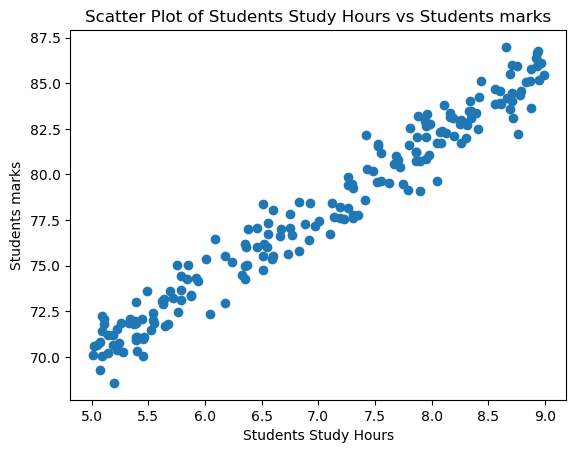

In [7]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [8]:
# Data Cleaning

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
df.study_hours.mean()

6.9959487179487185

In [11]:
df2 = df.fillna(df.study_hours.mean())

In [12]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [13]:
# split dataset

In [14]:
X = df2.drop("student_marks", axis = "columns")
y = df2.student_marks

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [16]:
X_train

,study_hours
118,5.69
107,5.72
114,7.12
111,6.37
66,7.86
...,...
168,7.95
67,8.26
104,7.23
78,5.09


In [17]:
y_train

118    73.61
107    73.25
114    78.42
111    75.04
66     81.25
       ...  
168    82.68
67     81.70
104    77.55
78     70.05
177    73.64
Name: student_marks, Length: 160, dtype: float64

In [18]:
X_test

,study_hours
53,5.520000
61,7.260000
9,6.750000
65,5.450000
161,7.300000
125,8.750000
187,5.540000
151,6.770000
171,7.190000
32,5.400000


In [19]:
y_test

53     71.45
61     79.41
9      77.82
65     70.06
161    79.49
125    85.95
187    72.01
151    76.70
171    77.63
32     71.10
21     83.36
71     71.79
58     70.90
127    77.65
40     70.27
36     81.24
62     76.19
44     82.38
190    73.14
199    83.50
84     77.29
175    71.11
11     83.88
170    71.18
7      85.46
144    83.82
106    72.10
13     80.76
51     77.77
81     82.93
110    81.08
163    77.07
103    79.26
148    82.02
2      78.68
165    71.94
50     72.22
182    86.99
17     85.11
41     86.41
Name: student_marks, dtype: float64

# Select a model and train it

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.coef_

array([3.84560605])

In [22]:
lr.intercept_

50.99614343172965

In [23]:
m = 3.9311199
c = 50.43905310413987
z  = m * 40 + c 
z

207.68384910413988

In [24]:
lr.predict([[40]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([204.82038541])

In [25]:
y_pred  = lr.predict(X_test)
y_pred

array([72.22388883, 78.91524335, 76.95398427, 71.9546964 , 79.06906759,
       84.64519637, 72.30080095, 77.03089639, 78.64605093, 71.7624161 ,
       82.3762888 , 70.64719035, 71.72396004, 78.45377063, 71.30094337,
       81.22260698, 75.41574185, 82.10709637, 73.26220246, 83.10695395,
       77.45391305, 71.72396004, 83.91453122, 70.95483883, 85.56814182,
       82.18400849, 71.53167974, 81.37643122, 79.10752365, 81.53025547,
       81.68407971, 76.95398427, 79.10752365, 82.91467364, 77.89980614,
       71.68550398, 70.57027822, 84.29909182, 83.45305849, 85.29894939])

In [26]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.520000,71.45,72.223889
1,7.260000,79.41,78.915243
2,6.750000,77.82,76.953984
3,5.450000,70.06,71.954696
4,7.300000,79.49,79.069068
5,8.750000,85.95,84.645196
6,5.540000,72.01,72.300801
7,6.770000,76.70,77.030896
8,7.190000,77.63,78.646051
9,5.400000,71.10,71.762416


## Fine-tune your model

In [27]:
lr.score(X_test,y_test)

0.9660614134168326

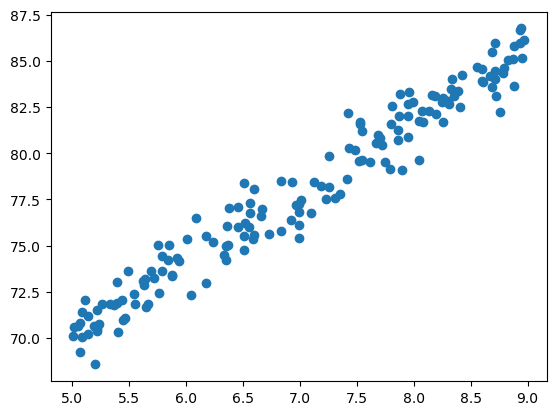

In [28]:
plt.scatter(X_train,y_train)  

In [29]:
lr.predict(X_train)

array([72.87764185, 72.99301004, 78.3768585 , 75.49265397, 81.22260698,
       74.10823579, 79.95355699, 71.07020701, 81.95327213, 80.95341456,
       84.06835546, 71.14711913, 81.72253577, 80.79959032, 80.68422213,
       79.53054032, 74.22360397, 78.29994638, 84.49137212, 84.49137212,
       73.49293882, 77.95384184, 75.45419791, 76.03103881, 70.26262974,
       80.99187062, 78.91524335, 71.72396004, 76.03103881, 75.33882973,
       70.4933661 , 83.26077819, 76.3386873 , 81.37643122, 72.30080095,
       73.14683428, 70.76255853, 85.33740545, 80.29966153, 74.76198882,
       73.608307  , 84.76056455, 85.41431758, 74.99272518, 76.60787972,
       79.76127668, 84.68365243, 84.95284485, 77.89980614, 79.49208426,
       79.56899638, 80.60731001, 73.45448276, 71.99315246, 78.64605093,
       83.91453122, 70.57027822, 74.41588427, 71.9546964 , 82.9531297 ,
       81.56871153, 85.33740545, 70.76255853, 83.03004182, 84.79902061,
       85.14512515, 75.83875851, 81.60716759, 84.10681152, 82.37

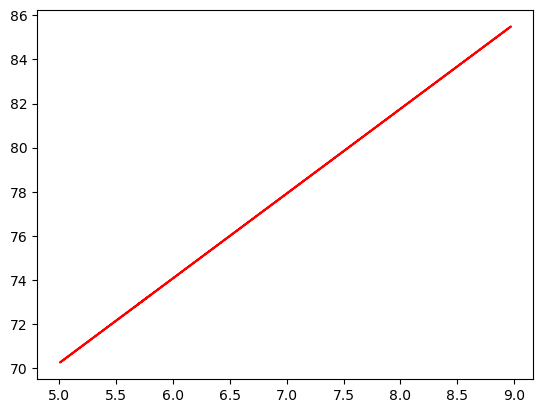

In [30]:
plt.plot(X_train, lr.predict(X_train), 'r-')

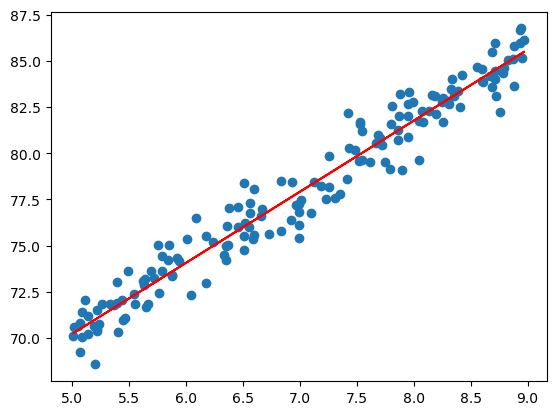

In [31]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

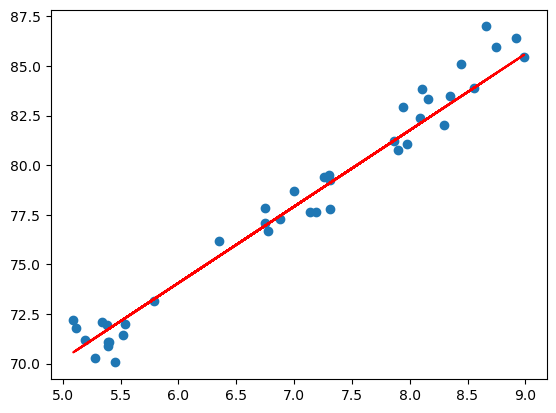

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

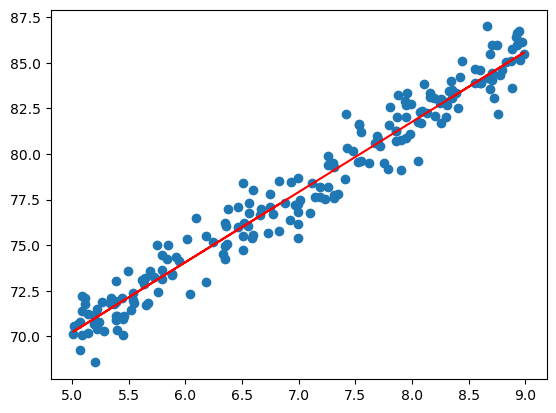

In [33]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")